In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil

## Defining ROOT and Working Directories

In [3]:
ROOT_DIR = '../input/pins-face-recognition/105_classes_pins_dataset'
DEST_DIR = './Data'

## Resetting Data in case of Re-Use ##

In [4]:
#shutil.rmtree("./Data")
#shutil.rmtree("./Model_Data")
#shutil.rmtree("./Model")

## Randomly choosing 'N' targets from the ROOT Dataset along with a category other than the 'N' targets consisting of miscellaneous other persons

In [5]:
n = 5  #int(input("Enter Number of Targets: "))
#shutil.rmtree("./Data")
import random
exclude=[]
target=[]
count=[]
no_of_images = {}

if not os.path.exists("./Data"):
    os.mkdir("./Data")
    for i in range(n):
        personfolder=os.listdir(ROOT_DIR)
        for item in exclude:
            if item in personfolder:
                personfolder.remove(item)
        person=random.choice(personfolder)
        src = (ROOT_DIR+'/'+person)
        dest = ('./Data/'+person[5:])
        destexcl = (person)
        exclude.append(destexcl)
        shutil.copytree(src,dest)
    
    for dir in os.listdir(DEST_DIR):
        no_of_images[dir] = len(os.listdir(os.path.join(DEST_DIR,dir)))
    othersno=max(no_of_images.values())
    
    if not os.path.exists("./Data/NON-TARGET"):
        os.mkdir("./Data/NON-TARGET")
        for i in range(othersno+2):
            person=random.choice(personfolder)
            files=os.listdir(ROOT_DIR+'/'+person)
            face=random.choice(files)
            src = (ROOT_DIR+'/'+person+'/'+face)
            dest = ('./Data/NON-TARGET/')
            shutil.copy(src,dest)
        
no_of_images = {}
for dir in os.listdir(DEST_DIR):
    no_of_images[dir] = len(os.listdir(os.path.join(DEST_DIR,dir)))
no_of_images.items()
print('\n')
for item in no_of_images:
    if item != 'NON-TARGET':
        target.append(item)
print('Target_Name\t\tNo_of_Images')
for item in target:
    print(item,'\t\t',no_of_images[item])
print('NON-TARGET','\t\t',no_of_images['NON-TARGET'])



Target_Name		No_of_Images
Dwayne Johnson 		 141
scarlett johansson 		 201
tom ellis 		 180
kiernen shipka 		 203
Rebecca Ferguson 		 178
NON-TARGET 		 203


## Displaying Random Images of Targets and Non-Target Persons

In [6]:
import random 
import cv2

def load_img(path,person):
    img = cv2.imread(path, 1)
    plt.axis("off")
    plt.title(person)
    return plt.imshow(img[...,::-1])

def random_person_facegen_mix():
    personfolder=os.listdir(DEST_DIR)
    person=random.choice(personfolder)
    files=os.listdir(DEST_DIR+'/'+person)
    imgpath=random.choice(files)
    return DEST_DIR+"/"+person+"/"+imgpath, person


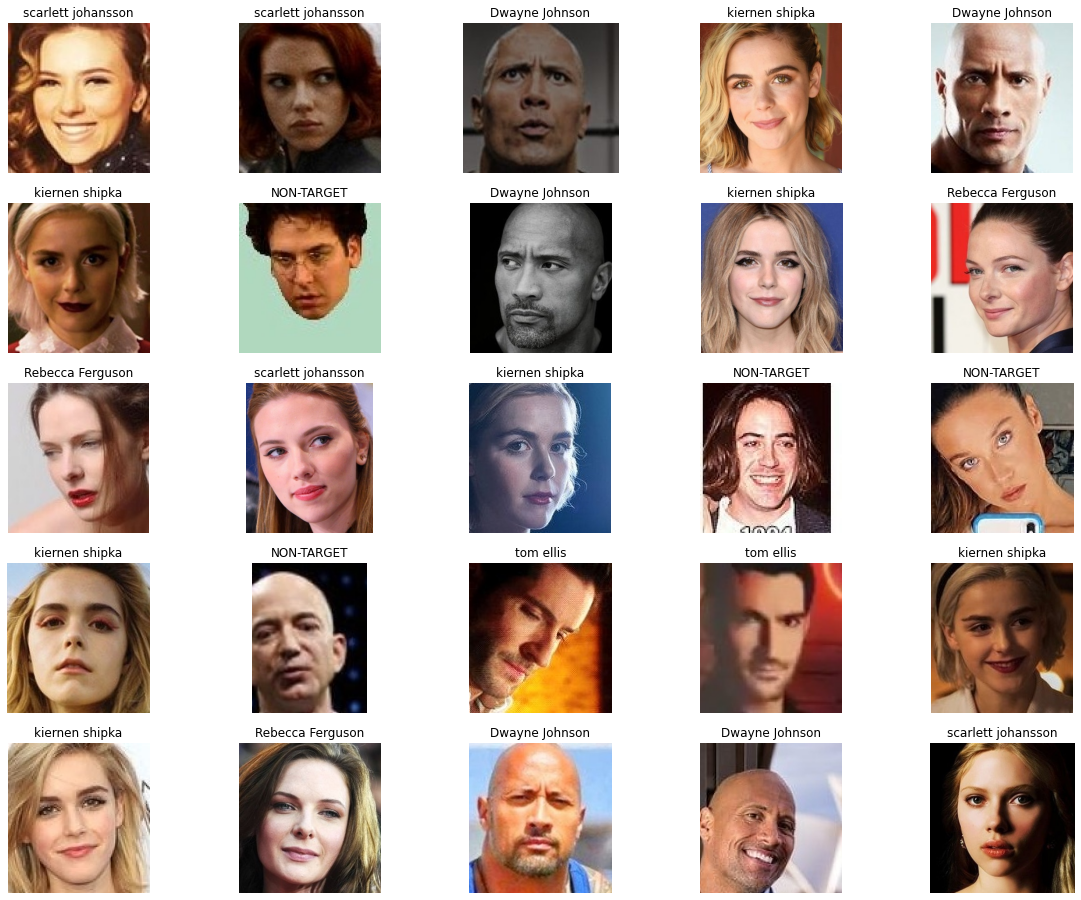

In [7]:
fig = plt.figure(figsize=(20, 16))
rows = columns = 5  
for i in range(1,26):
    fig.add_subplot(rows, columns, i)
    path, person = random_person_facegen_mix()
    load_img(path,person)

# Displaying Images of Targets

In [8]:
import random 
import cv2

def load_img(path,person):
    img = cv2.imread(path, 1)
    plt.axis("off")
    return plt.imshow(img[...,::-1])

def random_person_facegen(person):
    files=os.listdir(DEST_DIR+'/'+person)
    imgpath=random.choice(files)
    return DEST_DIR+"/"+person+"/"+imgpath

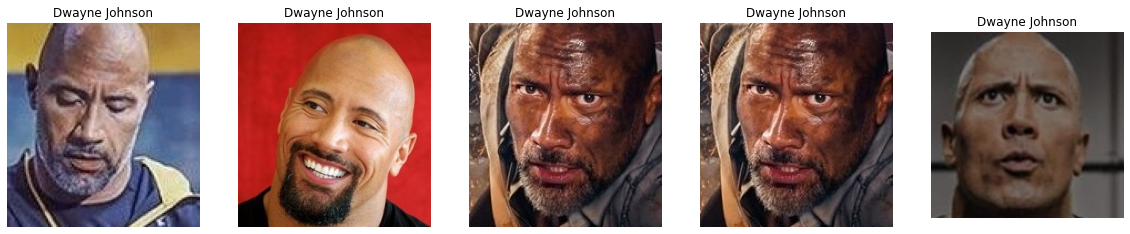

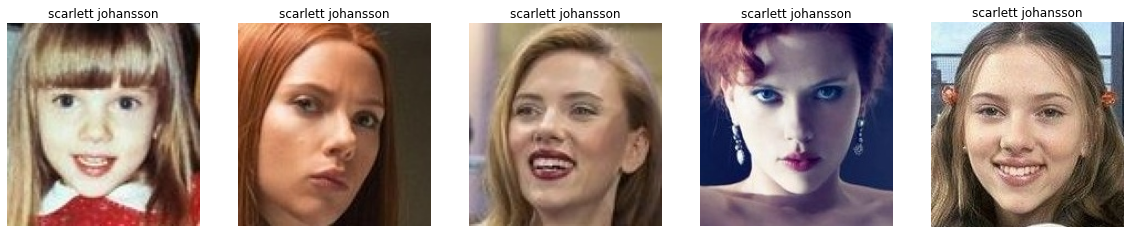

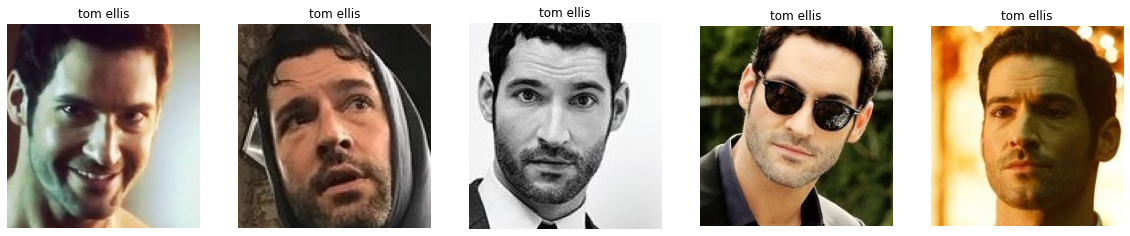

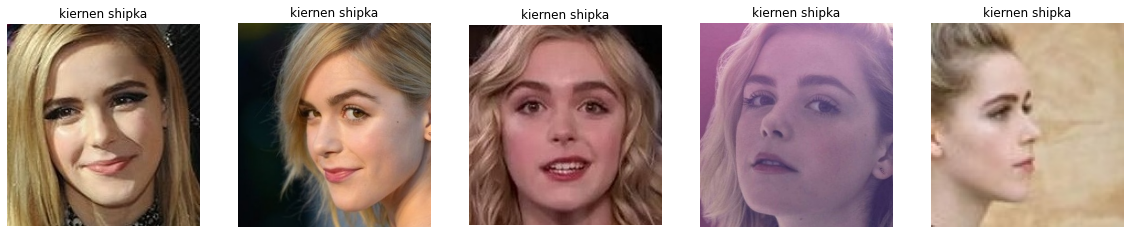

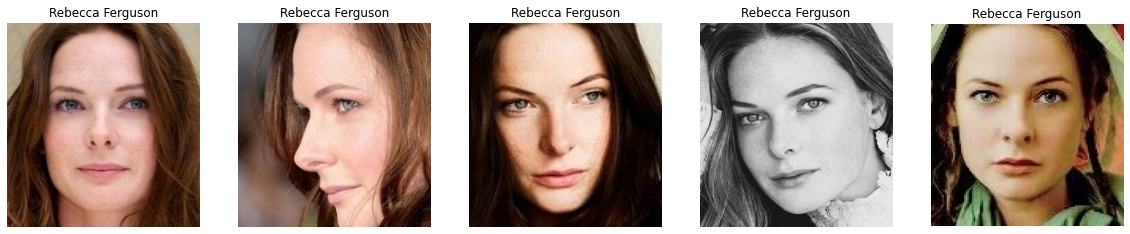

In [9]:
for person in target:
    fig = plt.figure(figsize=(20,17))
    rows=1
    columns=5
    for i in range(1,6):
            fig.add_subplot(rows, columns, i)
            plt.title(person)
            path = random_person_facegen(person)
            load_img(path,person)

# Displaying random NON-TARGET persons

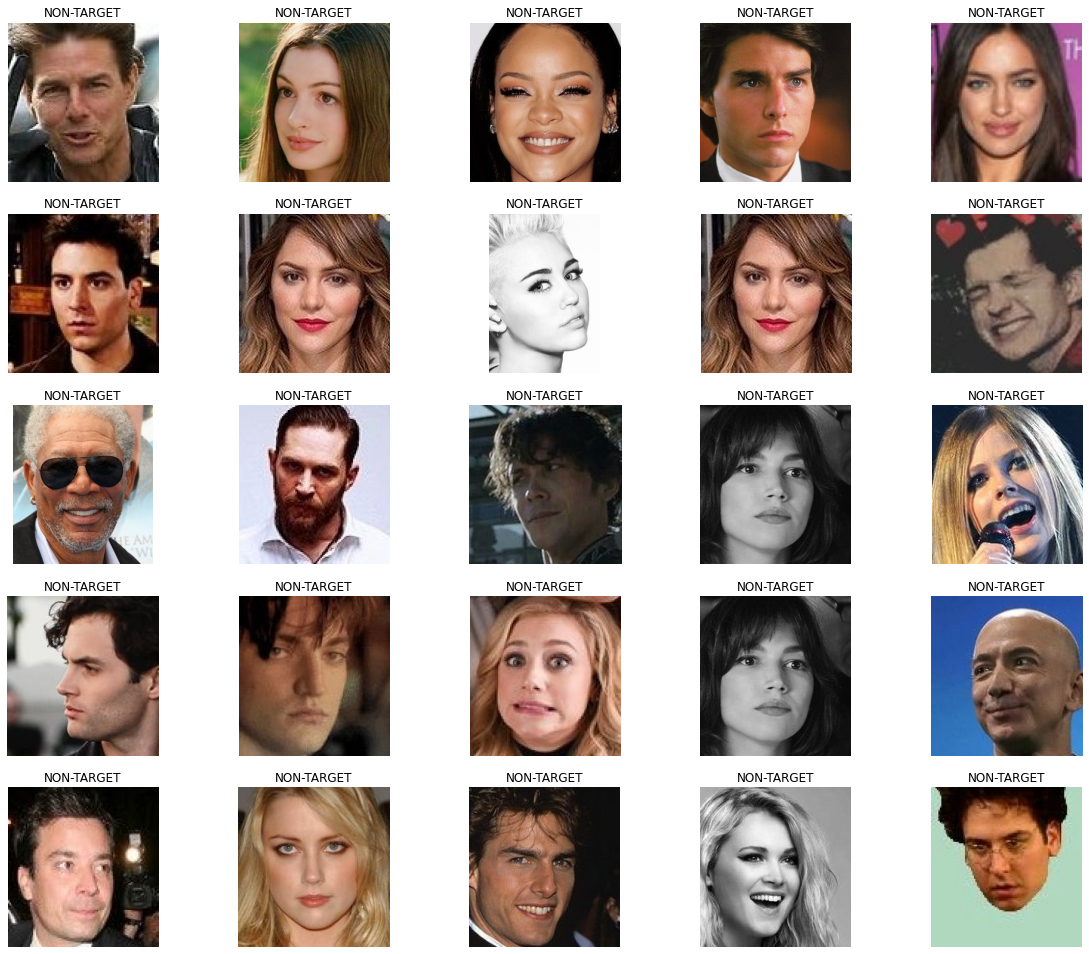

In [10]:
fig = plt.figure(figsize=(20,17))
rows=5
columns=5
for i in range(1,26):
    fig.add_subplot(rows, columns, i)
    plt.title('NON-TARGET')
    path = random_person_facegen('NON-TARGET')
    load_img(path,'NON-TARGET')

# Splitting dataset
## Train = 70%, 
## Validation = 30%
## Test = 50%

In [11]:
def dataFolder(p, split):
    if not os.path.exists("./Model_Data"):
        os.mkdir("./Model_Data")
    if not os.path.exists("./Model_Data/"+p):
        os.mkdir("./Model_Data/"+p)
        for dir in os.listdir(DEST_DIR):
            os.makedirs("./Model_Data/"+p+"/"+dir)
            for img in np.random.choice(a=os.listdir(os.path.join(DEST_DIR,dir)), size = (math.floor(split*no_of_images[dir])-5),replace=False):
                O = os.path.join(DEST_DIR,dir,img)
                D = os.path.join("./Model_Data/"+p,dir)
                shutil.copy(O,D)
    else:
        print(f"{p} Exists")

In [12]:
dataFolder("Train",0.7)
dataFolder("Val",0.3)
dataFolder("Test",0.5)

## Image Preprocessing with image resolution of (256 x 256) of 3 channels, RGB

In [13]:
from keras.preprocessing.image import ImageDataGenerator

def preprocessingTrain(path):
    image_data = ImageDataGenerator(featurewise_center=True,
                                    rotation_range=0.4,
                                    width_shift_range=0.3,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    rescale=1./255,
                                    horizontal_flip= True)

    image = image_data.flow_from_directory(directory= path,
                                           target_size=(256,256),
                                           batch_size=32,
                                           class_mode='categorical')
    return image

def preprocessingVal(path):
    image_data = ImageDataGenerator(rescale=1./255)
    image = image_data.flow_from_directory(directory= path,
                                           target_size=(256,256),
                                           batch_size=32,
                                           class_mode='categorical')
    return image

In [14]:
train_path="./Model_Data/Train"
train_data = preprocessingTrain(train_path)

Found 741 images belonging to 6 classes.


In [15]:
val_path="./Model_Data/Val"
val_data = preprocessingVal(val_path)

Found 299 images belonging to 6 classes.


In [16]:
test_path="./Model_Data/Test"
test_data = preprocessingVal(test_path)

Found 521 images belonging to 6 classes.


# Model Creation with Transfer Learning 
## Model Used: Inception_ResNet_V2
## Output Classes = n+1

In [17]:
from keras.models import Model
from keras.layers import Flatten, Dense
import keras.losses
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as IncRes

In [18]:
base_model = IncRes(input_shape=(256,256,3),weights='imagenet',include_top=False)
for layer in base_model.layers:
    layer.trainable=False

X=Flatten()(base_model.output)
X=Dense(units=n+1, activation='softmax')(X)

model_IncRes = Model(base_model.input, X)

model_IncRes.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model_IncRes.summary()

219070464/219055592 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
___________________________

## Saving best model using Model Checkpoint as callbacks

In [19]:
from keras.callbacks import ModelCheckpoint
mcIncRes= ModelCheckpoint(filepath="./Model/FaceRecog.hdf5", monitor="val_accuracy", verbose=1, save_best_only= True)
cbIncRes=[mcIncRes]

# Fit-Evaluation of model...
## Epochs = 100
## Training data: train_data
## Validation data: val_data
## Training steps per Epochs = 10
## Validation steps per Epochs = 8

In [20]:
his_IncRes = model_IncRes.fit_generator(train_data, steps_per_epoch= 10, epochs= 100, validation_data= val_data , validation_steps= 8, callbacks=cbIncRes)

Epoch 1/100
10/10 [==============================] - 25s 987ms/step - loss: 9.7194 - accuracy: 0.2688 - val_loss: 5.3675 - val_accuracy: 0.4102

Epoch 00001: val_accuracy improved from -inf to 0.41016, saving model to ./Model/FaceRecog.hdf5
Epoch 2/100
10/10 [==============================] - 6s 616ms/step - loss: 4.4583 - accuracy: 0.4573 - val_loss: 2.7761 - val_accuracy: 0.5000

Epoch 00002: val_accuracy improved from 0.41016 to 0.50000, saving model to ./Model/FaceRecog.hdf5
Epoch 3/100
10/10 [==============================] - 6s 622ms/step - loss: 2.9047 - accuracy: 0.4875 - val_loss: 2.0338 - val_accuracy: 0.6055

Epoch 00003: val_accuracy improved from 0.50000 to 0.60547, saving model to ./Model/FaceRecog.hdf5
Epoch 4/100
10/10 [==============================] - 6s 630ms/step - loss: 1.7022 - accuracy: 0.5969 - val_loss: 1.9449 - val_accuracy: 0.6328

Epoch 00004: val_accuracy improved from 0.60547 to 0.63281, saving model to ./Model/FaceRecog.hdf5
Epoch 5/100
10/10 [===========

# Model Accuracy and Loss Plots 

In [21]:
hIncRes = his_IncRes.history
hIncRes.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

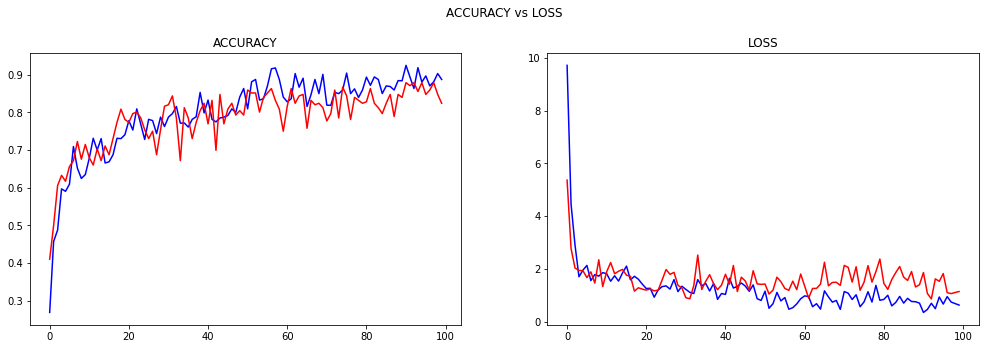

In [22]:
fig = plt.figure(figsize=(17, 5))
plt.axis("off")
plt.title("ACCURACY vs LOSS\n\n")
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.title("ACCURACY")
plt.plot(hIncRes['accuracy'], c='blue')
plt.plot(hIncRes['val_accuracy'], c='red')
fig.add_subplot(rows, columns, 2)
plt.title("LOSS")
plt.plot(hIncRes['loss'], c='blue')
plt.plot(hIncRes['val_loss'], c='red')


## Defining the classes for labelling the final outcome

In [23]:
classes = val_data.class_indices

classes = list(classes.keys())

for i in range(0,n+1):
    classes[i]=classes[i]

## Importing the Saved Best-Model File 

In [24]:
from keras.models import load_model
model=load_model("./Model/FaceRecog.hdf5")


# Predicting a random Celebrity Picture using the model and showing it's Class Output

Rebecca Ferguson


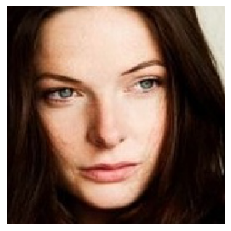

In [25]:
from tensorflow.keras.preprocessing import image
def random_face():
    personfolder=os.listdir('./Model_Data/Test')
    person=random.choice(personfolder)
    files=os.listdir('./Model_Data/Test/'+person)
    imgpath=random.choice(files)
    return './Model_Data/Test/'+person+"/"+imgpath

from keras.applications.inception_resnet_v2 import preprocess_input
path = random_face()

img= image.load_img(path, target_size=(256,256,3))
plt.imshow(img)
plt.axis("off")
i = image.img_to_array(img)
i=preprocess_input(i)
input_arr = np.array([i])

pred= np.argmax(model.predict(input_arr))

print(classes[pred])